Cluster Characteristics:
         danceability    energy  acousticness  instrumentalness   valence  \
Cluster                                                                     
0            0.525812  0.760403      0.100107          0.004141  0.465668   
1            0.679994  0.601188      0.119861          0.003789  0.335265   
2            0.540083  0.424786      0.639977          0.007122  0.345701   
3            0.732417  0.750097      0.124209          0.003737  0.716812   
4            0.624640  0.568651      0.214035          0.774413  0.416963   

              tempo  
Cluster              
0        154.201116  
1        108.626350  
2        117.078379  
3        114.153402  
4        125.738709  


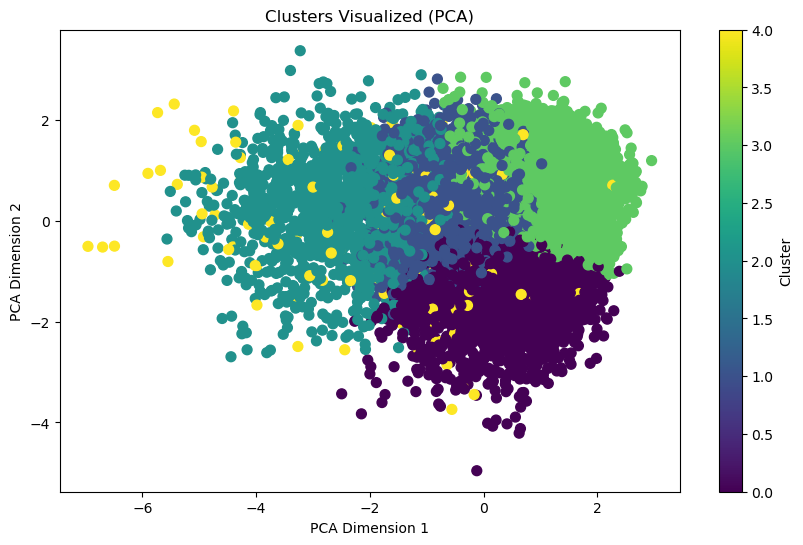

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Step 1: Load the Dataset
# Replace 'audio_1.csv' with your dataset's file path
file_path = 'audio_1.csv'
audio_data = pd.read_csv(file_path)

# Step 2: Clean and Prepare the Data
# Select relevant features for clustering
features = ['danceability', 'energy', 'acousticness', 'instrumentalness', 'valence', 'tempo']
audio_data_clean = audio_data[features].dropna()

# Step 3: Standardize the Data
scaler = StandardScaler()
audio_data_scaled = scaler.fit_transform(audio_data_clean)

# Step 4: Apply KMeans Clustering
n_clusters = 5  # Change this based on your analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(audio_data_scaled)

# Add cluster labels to the dataset
audio_data_clean['Cluster'] = clusters

# Step 5: Analyze Cluster Characteristics
# Calculate average feature values for each cluster
cluster_centroids = audio_data_clean.groupby('Cluster').mean()
print("Cluster Characteristics:")
print(cluster_centroids)

# Label each cluster based on characteristics
cluster_labels = {
    0: 'Energetic Dance Tracks',
    1: 'Relaxing Acoustic Tunes',
    2: 'Upbeat Happy Songs'
}

# Add cluster labels to the dataset
audio_data_clean['Cluster_Label'] = audio_data_clean['Cluster'].map(cluster_labels)

# Step 6: Visualize Clusters in 2D
# Reduce dimensions using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(audio_data_scaled)

# Plot clusters in 2D
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Clusters Visualized (PCA)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

# Step 7: Generate Playlists
# Group songs into playlists by cluster
#playlists = {}
#for cluster in audio_data_clean['Cluster'].unique():
   # playlist_name = f'Playlist_{cluster_labels[cluster]}'
    #playlists[playlist_name] = audio_data_clean[audio_data_clean['Cluster'] == cluster]

# Save playlists as CSV files
#for name, playlist in playlists.items():
 #   playlist.to_csv(f'{name}.csv', index=False)
  #  print(f'Saved {name} with {len(playlist)} songs.')

# Step 8: Recommend Similar Songs
#def recommend_similar(song_index, num_recommendations=5):
    # Find similar songs within the same cluster
    #selected_song = audio_data_scaled[song_index].reshape(1, -1)
   # cluster_id = clusters[song_index]
    #cluster_data = audio_data_scaled[clusters == cluster_id]
   # distances = cdist(selected_song, cluster_data, metric='euclidean')
    #closest_indices = distances.argsort()[0][:num_recommendations]
    #similar_songs = audio_data_clean.iloc[closest_indices]
   # return similar_songs

## Example: Recommend 5 songs similar to the first song in the dataset
#recommendations = recommend_similar(song_index=0, num_recommendations=5)
#print("Recommended Songs:")
#print(recommendations)

In [2]:
recommendations


,danceability,energy,acousticness,instrumentalness,valence,tempo,Cluster,Cluster_Label
7,0.000,0.532,0.976000,0.000000,0.0000,0.000,2,Upbeat Happy Songs
1642,0.517,0.609,0.153000,0.000000,0.1620,135.489,1,Relaxing Acoustic Tunes
945,0.467,0.672,0.005590,0.243000,0.0648,163.100,1,Relaxing Acoustic Tunes
221,0.613,0.803,0.000525,0.000333,0.4610,127.989,1,Relaxing Acoustic Tunes
1813,0.630,0.399,0.105000,0.174000,0.0657,183.016,1,Relaxing Acoustic Tunes


: 

: 

In [9]:
cluster

0

: 

In [8]:
# Group songs by cluster and display a specific cluster
for cluster_label in audio_data_clean['Cluster_Label'].unique():
    print(f"\nSongs in Cluster: {cluster_label}")
    cluster_songs = audio_data_clean[audio_data_clean['Cluster_Label'] == cluster_label]
    print(cluster_songs)


Songs in Cluster: Upbeat Happy Songs
       danceability  energy  acousticness  instrumentalness  valence    tempo  \
7             0.000   0.532         0.976          0.000000   0.0000    0.000   
8             0.250   0.215         0.632          0.071700   0.0746  174.824   
9             0.250   0.136         0.673          0.000157   0.0981  118.086   
10            0.375   0.133         0.651          0.000000   0.1920  131.721   
11            0.375   0.428         0.109          0.000000   0.3610   78.516   
...             ...     ...           ...               ...      ...      ...   
10731         0.631   0.356         0.731          0.000000   0.3730  119.927   
10732         0.631   0.518         0.274          0.000000   0.2050   93.023   
10746         0.631   0.591         0.667          0.000000   0.4940   97.087   
10749         0.631   0.496         0.428          0.000001   0.3650  143.735   
10754         0.631   0.494         0.310          0.000018   0.5420   

: 

: 

: 

: 

: 

In [10]:
# Display songs from a specific cluster
cluster_label_to_view = "Energetic Dance Tracks"  # Change this to the desired cluster
cluster_songs = audio_data_clean[audio_data_clean['Cluster_Label'] == cluster_label_to_view]
print(cluster_songs)

       danceability  energy  acousticness  instrumentalness  valence    tempo  \
33            0.625   0.848       0.10500          0.000000    0.716  137.993   
34            0.625   0.936       0.04570          0.000000    0.804  144.010   
35            0.625   0.840       0.10900          0.000555    0.656  111.020   
36            0.625   0.826       0.12100          0.000000    0.699   99.919   
38            0.625   0.786       0.03430          0.000001    0.537  119.982   
...             ...     ...           ...               ...      ...      ...   
10777         0.881   0.830       0.01440          0.007710    0.765   98.793   
10778         0.881   0.457       0.03270          0.000000    0.296  136.970   
10779         0.881   0.636       0.00606          0.000000    0.715  163.949   
10781         0.881   0.442       0.48000          0.000009    0.803  138.014   
10782         0.881   0.623       0.25700          0.000002    0.744   88.953   

       Cluster           Cl

: 